<a href="https://colab.research.google.com/github/sujayeendra98/sujayeendra98/blob/master/McDonald's_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Name : McDonalds EDA and Healthy Recommendation

1.   EDA - Exploratary Data Analysis
2.   Machine Learning Algorithm - unsupervised(K-Means Clustering)






In [2]:
# import necessary packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Extract the Data 

Data = pd.read_csv("/content/menu.csv")
Data.info()

In [ ]:
Data.head(5)



1.   The %DV shows how much a nutrient in a serving of a food contributes to a total daily diet.
2.   More than 20%dv is not healthy food



In [ ]:
Data.describe()

In [ ]:
#check the missing data
Data.isna().sum()


In [8]:
Data.columns

Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')

**Data Preparation**

In [ ]:
Data_new = Data[[
                 'Category',
                 'Item',
                 'Calories',
                 'Protein',
                 'Total Fat',
                 'Saturated Fat',
                 'Carbohydrates',
                 'Trans Fat',
                 'Cholesterol',
                 'Sodium'

]]

Data_new.head(5)

How Calories are distributed


In [24]:
Data_new["Calories"].describe()

count     260.000000
mean      368.269231
std       240.269886
min         0.000000
25%       210.000000
50%       340.000000
75%       500.000000
max      1880.000000
Name: Calories, dtype: float64

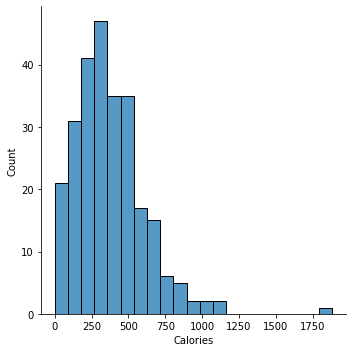

In [29]:
sns.displot(Data_new["Calories"])

In [38]:
High_Calorie = Data_new.query('Calories > 1500')
High_Calorie['Item']

82    Chicken McNuggets (40 piece)
Name: Item, dtype: object

In [37]:
Low_Calorie = Data_new.query('Calories < 10')
Low_Calorie['Item'].head(5)

114         Diet Coke (Small)
115        Diet Coke (Medium)
116         Diet Coke (Large)
117         Diet Coke (Child)
122    Diet Dr Pepper (Small)
Name: Item, dtype: object

In [39]:
# Category VS Calories

Calories = Data_new.drop('Item' , axis=1)
Calories = Data_new.groupby(['Category'])["Calories"].mean()
Calories = Calories.sort_values(ascending = False)

print(Calories)

Category
Chicken & Fish        552.962963
Smoothies & Shakes    531.428571
Breakfast             526.666667
Beef & Pork           494.000000
Coffee & Tea          283.894737
Salads                270.000000
Snacks & Sides        245.769231
Desserts              222.142857
Beverages             113.703704
Name: Calories, dtype: float64


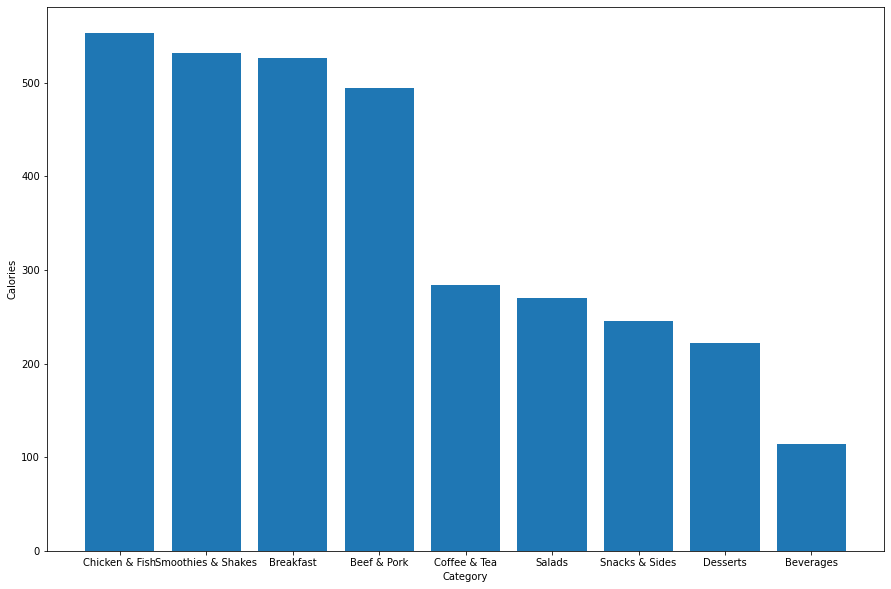

In [55]:
Category = ['Chicken & Fish', 'Smoothies & Shakes', 'Breakfast',
'Beef & Pork', 'Coffee & Tea', 'Salads', 'Snacks & Sides','Desserts','Beverages']
plt.figure(figsize = (15,10))
plt.xlabel("Category")
plt.ylabel("Calories")
plt.bar(Category , Calories)
plt.show()